<a href="https://colab.research.google.com/github/Harshubh-Meherishi/FashionMNIST-Nueral-Network-PyTorch-/blob/master/Fashion_MNIST_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing Libraries and getting Data

!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
import torch 
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
#transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,),(0.5,))
                               ])

#Download and load the data
trainset = datasets.FashionMNIST('FMnist-data/',download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST('FMnist-data/',download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle = True)

--2020-08-31 03:57:40--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
#Defining Model:
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32,10),
                      nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr =0.002)


In [ ]:
train_losses, test_losses = [], []
epochs = 30
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        
        log_ps = model.forward(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                images = images.view(images.shape[0],-1)
                log_ps = model.forward(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.328..  Test Loss: 0.303..  Test Accuracy: 0.889
Epoch: 2/30..  Training Loss: 0.309..  Test Loss: 0.311..  Test Accuracy: 0.885
Epoch: 3/30..  Training Loss: 0.292..  Test Loss: 0.291..  Test Accuracy: 0.897
Epoch: 4/30..  Training Loss: 0.283..  Test Loss: 0.247..  Test Accuracy: 0.908
Epoch: 5/30..  Training Loss: 0.270..  Test Loss: 0.262..  Test Accuracy: 0.900
Epoch: 6/30..  Training Loss: 0.263..  Test Loss: 0.239..  Test Accuracy: 0.911
Epoch: 7/30..  Training Loss: 0.250..  Test Loss: 0.249..  Test Accuracy: 0.911
Epoch: 8/30..  Training Loss: 0.242..  Test Loss: 0.243..  Test Accuracy: 0.909
Epoch: 9/30..  Training Loss: 0.236..  Test Loss: 0.222..  Test Accuracy: 0.917
Epoch: 10/30..  Training Loss: 0.227..  Test Loss: 0.198..  Test Accuracy: 0.926
Epoch: 11/30..  Training Loss: 0.219..  Test Loss: 0.204..  Test Accuracy: 0.925
Epoch: 12/30..  Training Loss: 0.215..  Test Loss: 0.188..  Test Accuracy: 0.930
Epoch: 13/30..  Training Loss: 0.211.

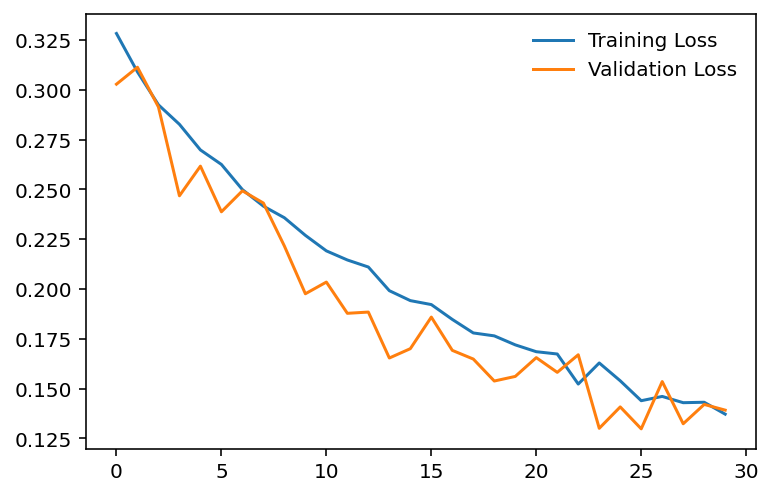

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.pyplot as plt
 
plt.plot(train_losses, label = 'Training Loss')
plt.plot(test_losses, label = 'Validation Loss')
plt.legend(frameon = False)

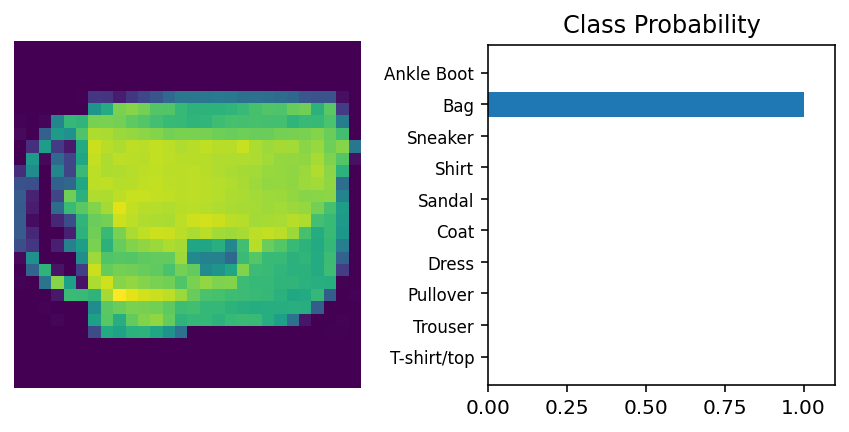

In [ ]:
import helper
images,labels = next(iter(trainloader))
img = images[0].view(1,784)
with torch.no_grad():
  logits = model.forward(img)

ps = F.softmax(logits,dim=1)

helper.view_classify(img.view(1,28,28),ps,version= 'Fashion')